### Supervised learning
Linear Regression <br />
Nearest Neighbor <br />
Gaussian Naive Bayes <br />
Decision Trees <br />
Support Vector Machine (SVM) <br />
Random Forest <br />

1. Linear regression

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts

In [3]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [18]:
pd.to_numeric(df['Salary'])

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [25]:
x = df.iloc[:, :-1].values
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [26]:
y = df.iloc[:, -1].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [27]:
lr = LinearRegression()

In [57]:
X_train, X_test, y_train, y_test = tts(x, y, test_size=1/3, random_state=0)

In [58]:
lr.fit(X_train, y_train)

LinearRegression()

In [59]:
y_pred = lr.predict(X_test)

In [60]:
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [61]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse

In [63]:
#accuracy_score(y_test, y_pred)
# accuracy cannot be used in regression cause it is a classification metric

In [64]:
mse(y_test, y_pred)

21026037.329511296

In [65]:
import math
math.sqrt(mse(y_test, y_pred))

4585.4157204675885

In [66]:
lr.score(X_train, y_train)

0.9381900012894278

In [67]:
lr.intercept_

26816.19224403119

In [68]:
lr.coef_

array([9345.94244312])

In [70]:
lr.predict([[5.3]])

array([76349.68719258])

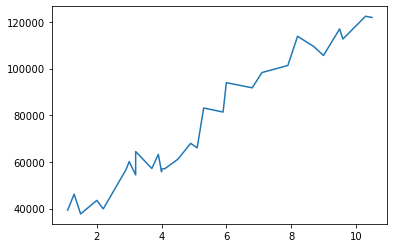

In [72]:
plt.plot(x, y)

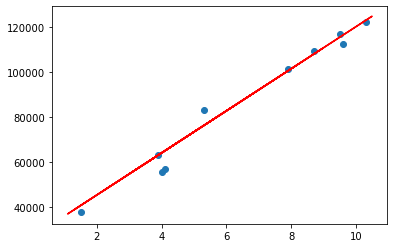

In [73]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color='red')

### 2. K nearest neighbors

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
len(df[df['Purchased']==1])-len(df)

-257

In [9]:
df.shape[0]

400

In [16]:
y = df.iloc[:, -1].values
x = df.iloc[:, 1:-1].values

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
x[:, 0] = le.fit_transform(x[:, 0])

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ...,
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], dtype=object)

# regression on insurance data

In [2]:
df = pd.read_csv('insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:xlabel='region', ylabel='charges'>

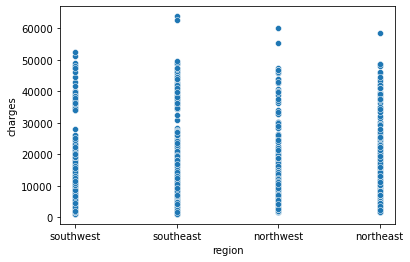

In [11]:
sns.scatterplot(data=df, x='region', y='charges')

In [16]:
#label encoding

from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [19]:
df.corr()['charges']

age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region     -0.006208
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot:xlabel='charges', ylabel='bmi'>

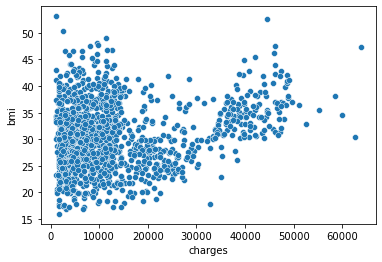

In [28]:
sns.scatterplot(data=df, x="charges", y="bmi")

C:\Users\sumanthkaleswaram\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

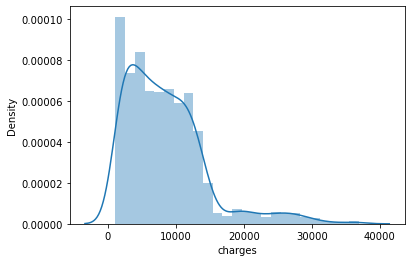

In [37]:
sns.distplot(df[df['smoker']==0]['charges'])

In [38]:
df.groupby('smoker').count()

,age,sex,bmi,children,region,charges
smoker,,,,,,
0,1064,1064,1064,1064,1064,1064
1,274,274,274,274,274,274
